In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Pre-Processing

In [2]:
df=pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
pd.options.display.max_columns=None
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df.shape

(9994, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

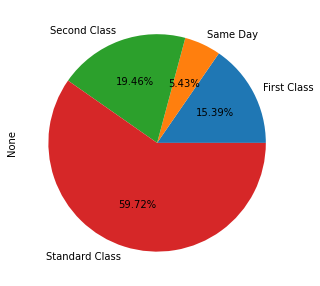

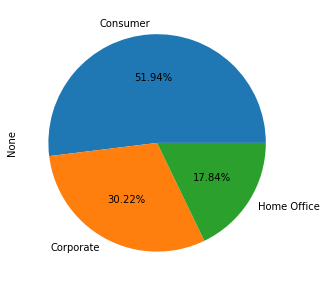

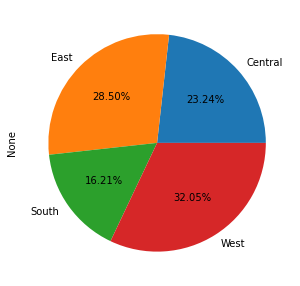

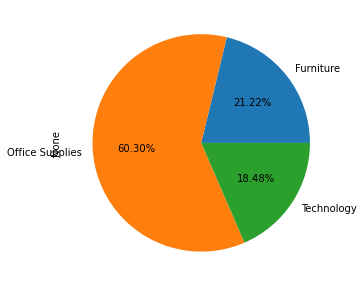

In [8]:
cat=['Ship Mode','Segment','Region','Category']
for i in cat:
    plt.figure(figsize=(20,5))
    df.groupby(i).size().plot(kind='pie',autopct='%0.2f%%');

[9.876e+03 9.100e+01 1.300e+01 6.000e+00 5.000e+00 0.000e+00 1.000e+00
 1.000e+00 0.000e+00 1.000e+00]
[4798.  146. 3657.  227.   27.  217.   66.  138.  418.  300.]
[1.000e+00 2.000e+00 4.000e+00 3.400e+01 9.907e+03 3.500e+01 5.000e+00
 4.000e+00 1.000e+00 1.000e+00]


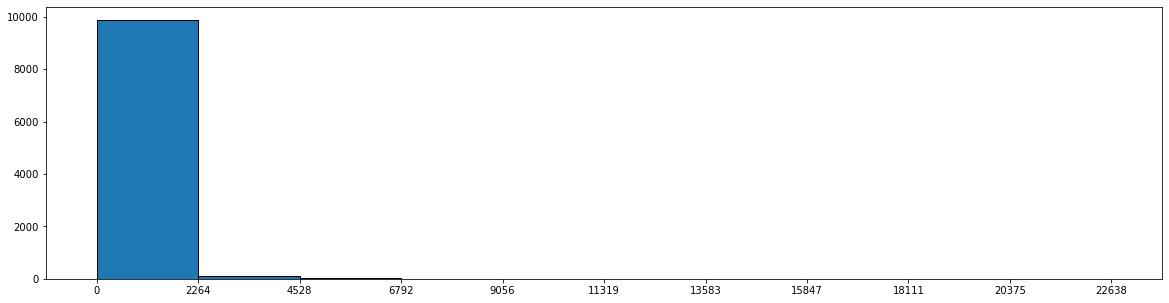

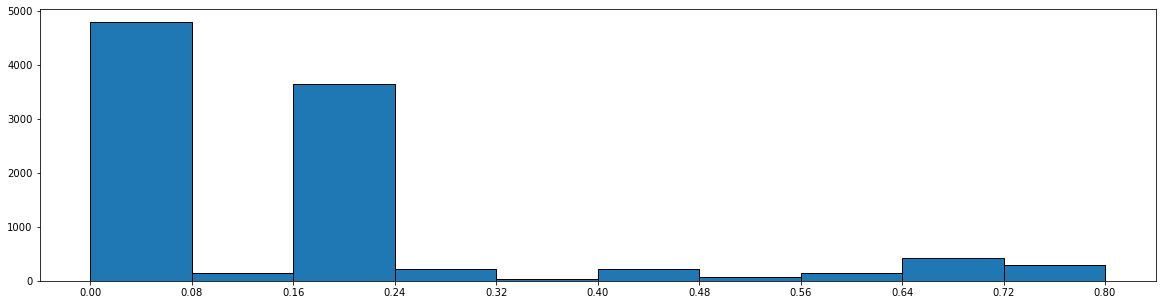

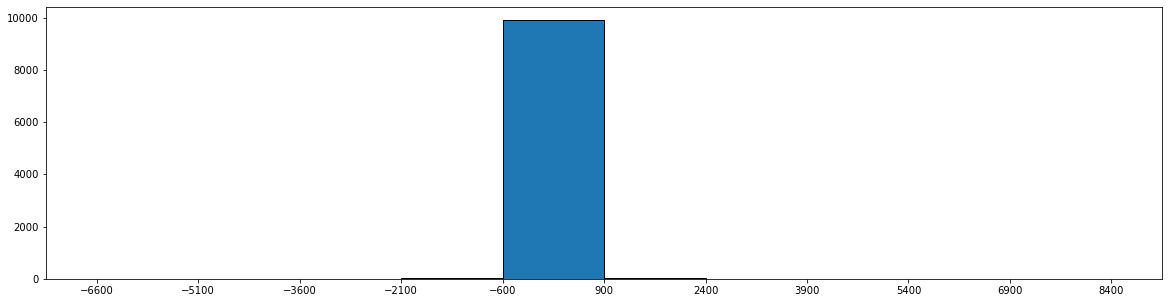

In [9]:
num=['Sales','Discount','Profit']
for i in num:
    plt.figure(figsize=(20,5))
    n,bins,patches=plt.hist(df[i],edgecolor='black')
    print(n)
    plt.xticks(bins)

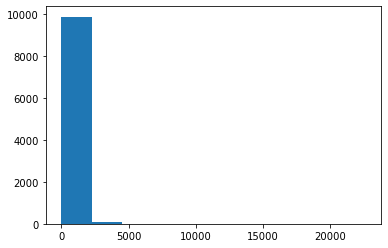

In [10]:
plt.hist(df['Sales']);

In [11]:
#data preparation for time series

In [12]:
df.set_index('Order Date',inplace=True)
df.sort_index(inplace=True)
df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-03,7981,CA-2014-103800,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-04,740,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01-04,741,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2014-01-04,742,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2014-01-05,1760,CA-2014-141817,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,5092,CA-2017-156720,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
2017-12-30,909,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
2017-12-30,908,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279


In [13]:
dff=df[df.Category=='Furniture']
dff

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-06,7475,CA-2014-167199,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
2014-01-07,7661,CA-2014-105417,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
2014-01-10,867,CA-2014-149020,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,Virginia,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
2014-01-11,717,CA-2014-130092,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,Delaware,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
2014-01-13,2979,CA-2014-109232,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,South Carolina,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29,7636,US-2017-158526,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,Kentucky,40214,South,FUR-CH-10004495,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842
2017-12-29,5458,CA-2017-130631,2018-01-02,Standard Class,BS-11755,Bruce Stewart,Consumer,United States,Edmonds,Washington,98026,West,FUR-FU-10004093,Furniture,Furnishings,Hand-Finished Solid Wood Document Frame,68.460,2,0.0,20.5380
2017-12-29,1878,CA-2017-118885,2018-01-02,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,California,90049,West,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",393.568,4,0.2,-44.2764


In [14]:
dff.Category.unique()

array(['Furniture'], dtype=object)

In [15]:
dfo=df[df.Category=='Office Supplies']
dfo.head(2)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-03,7981,CA-2014-103800,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-04,740,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717


In [16]:
dfo.shape

(6026, 20)

In [17]:
dfo.Category.unique()

array(['Office Supplies'], dtype=object)

In [18]:
dft=df[df.Category=='Technology']

In [19]:
dft.shape

(1847, 20)

In [20]:
dft.Category.unique()

array(['Technology'], dtype=object)

Office Supplies are more in number with 6026

Furniture are 2121 and Technology are 1847

In [21]:
sales=df[['Sales']]

In [22]:
sales_f=dff[['Sales']]
sales_o=dfo[['Sales']]
sales_t=dft[['Sales']]

In [23]:
sales_f.shape

(2121, 1)

In [24]:
m_f=sales_f.resample('M').sum()
m_o=sales_o.resample('M').sum()
m_t=sales_t.resample('M').sum()

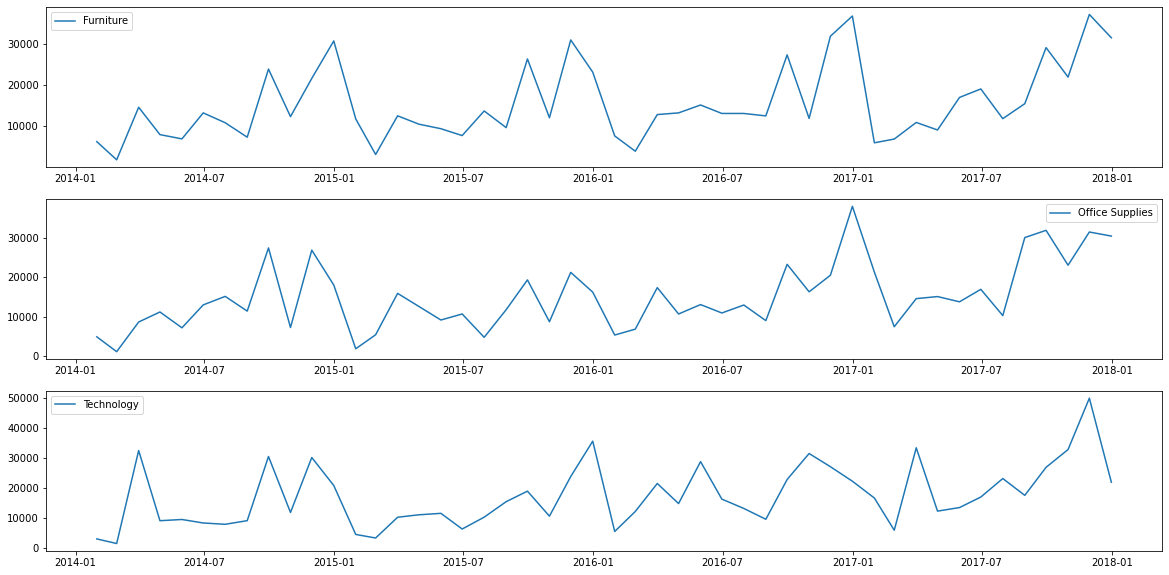

In [25]:
fig,ax=plt.subplots(3,1,figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(m_f,label='Furniture')
plt.legend()
plt.subplot(3,1,2)
plt.plot(m_o,label='Office Supplies')
plt.legend()
plt.subplot(3,1,3)
plt.plot(m_t,label='Technology')
plt.legend()

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.api import SimpleExpSmoothing,ExponentialSmoothing
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [27]:
#Data Stationary

In [28]:
def stationarycheck(data):
    pvalue=adfuller(data)[1]
    if (pvalue>0.05):
        msg='p_value={}.Data is not stationary'.format(pvalue)
    else:
        msg='p_value={}.Data is stationary'.format(pvalue)
        
    return(msg)
        

In [29]:
stationarycheck(m_f)  #Furniture

'p_value=8.450793985809654e-05.Data is stationary'

In [30]:
stationarycheck(m_o) #office supplies

'p_value=0.32948727549472817.Data is not stationary'

In [31]:
stationarycheck(m_t) #Technology

'p_value=1.8615967302063814e-06.Data is stationary'

### Furniture

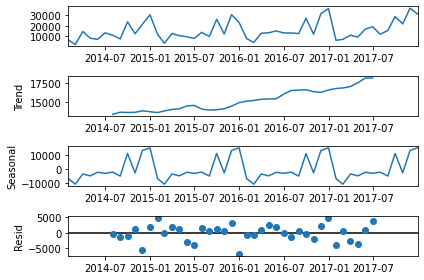

In [32]:
decomposition_f=seasonal_decompose(m_f,period=12)
decomposition_f.plot();

In [33]:
fte=ExponentialSmoothing(m_f,trend='mul',seasonal='mul',seasonal_periods=12).fit(smoothing_level=0.6,smoothing_trend=0.25,smoothing_seasonal=0.15)

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [34]:
forecasted_f=fte.fittedvalues

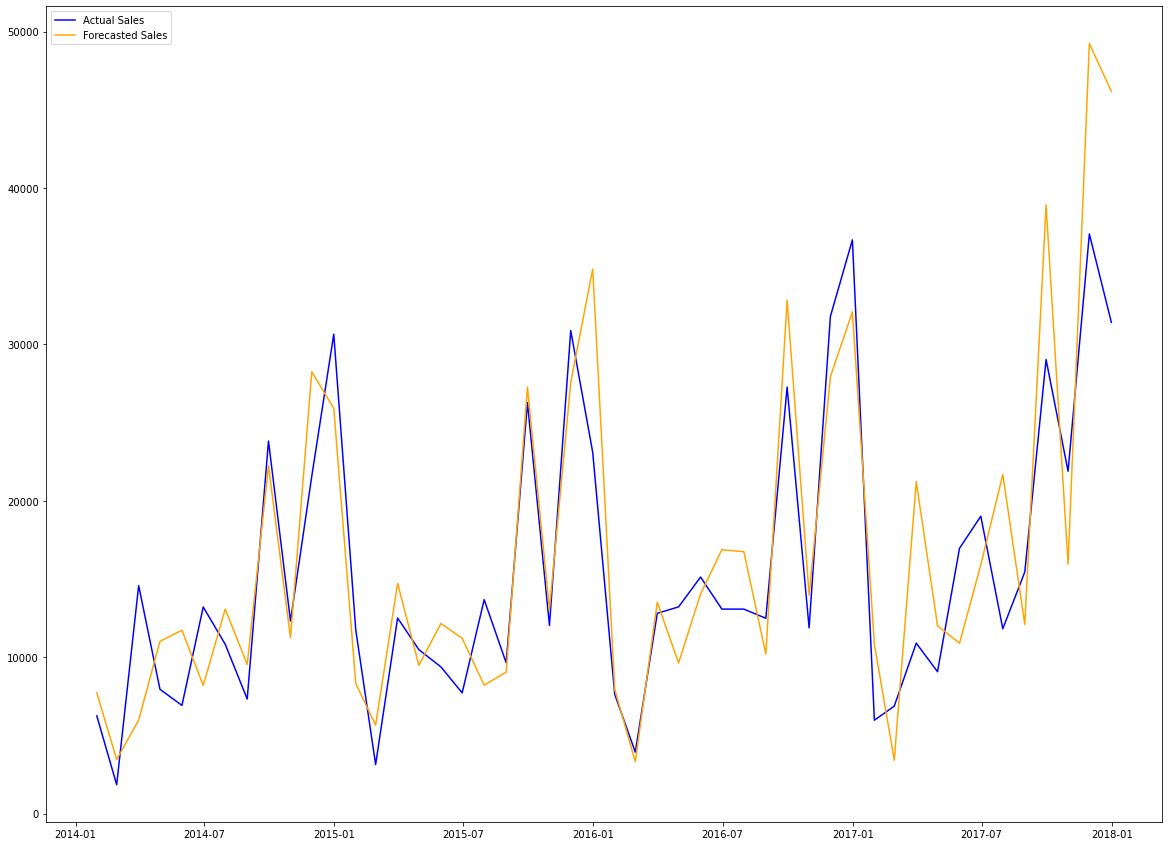

In [35]:
plt.figure(figsize=(20,15))
plt.plot(m_f,color='blue',label='Actual Sales')
plt.plot(forecasted_f,color='orange',label='Forecasted Sales')
plt.legend()

In [36]:
stationarycheck(forecasted_f)

'p_value=0.0002194618828771754.Data is stationary'

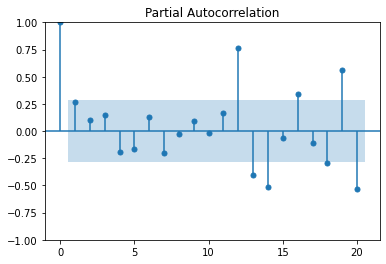

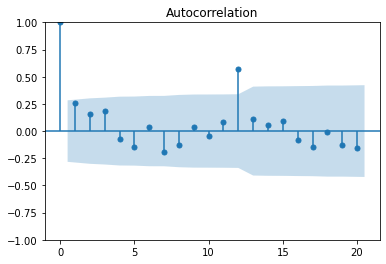

In [37]:
plot_pacf(forecasted_f,lags=20);
plot_acf(forecasted_f,lags=20);

In [38]:
#p=6,q=1 for furniture sales

In [39]:
z=[1,2,3,4,5,6]
for i in z:
    ar=ARIMA(forecasted_f,order=(i,0,0))
    a=ar.fit()
    print(a.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -511.937
Date:                Tue, 31 Jan 2023   AIC                           1029.874
Time:                        13:13:45   BIC                           1035.488
Sample:                    01-31-2014   HQIC                          1031.996
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.66e+04   2187.351      7.591      0.000    1.23e+04    2.09e+04
ar.L1          0.3027      0.130      2.329      0.020       0.048       0.557
sigma2       1.08e+08      0.174   6.21e+08      0.0

p=1 has less aic value

In [40]:
split=int(0.7*len(forecasted_f))
train=forecasted_f.iloc[:split]
test=forecasted_f.iloc[split:]
print(len(train),len(test))

33 15


In [41]:
arma=ARIMA(forecasted_f,order=(1,0,1))
ar1=arma.fit()
print(ar1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -511.161
Date:                Tue, 31 Jan 2023   AIC                           1030.322
Time:                        13:13:45   BIC                           1037.807
Sample:                    01-31-2014   HQIC                          1033.150
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.66e+04   3476.497      4.776      0.000    9790.309    2.34e+04
ar.L1          0.7495      0.363      2.066      0.039       0.038       1.461
ma.L1         -0.4483      0.421     -1.064      0.2

In [42]:
pvalue = sm.stats.acorr_ljungbox(ar1.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

[0.78791487]
Fail-to-Reject H0. Good model


In [43]:
predictions=ar1.predict(len(train),len(test+train)-1)
print(predictions)

Order Date
2016-10-31    20547.250678
2016-11-30    17574.595814
2016-12-31    20451.380073
2017-01-31    22988.136574
2017-02-28    17724.622138
2017-03-31    13133.466258
2017-04-30    16438.446785
2017-05-31    15145.441195
2017-06-30    14228.704984
2017-07-31    15327.290080
2017-08-31    17559.482343
2017-09-30    15673.328167
2017-10-31    22906.127760
2017-11-30    19230.345415
2017-12-31    27609.327019
Freq: M, Name: predicted_mean, dtype: float64


In [44]:
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

          actual     predicted           err
0   13956.595174  20547.250678  -6590.655504
1   27933.957810  17574.595814  10359.361996
2   32074.554634  20451.380073  11623.174561
3   10821.136823  22988.136574 -12166.999751
4    3412.056735  17724.622138 -14312.565403
5   21220.583025  13133.466258   8087.116767
6   12007.320179  16438.446785  -4431.126606
7   10888.193154  15145.441195  -4257.248041
8   15900.653251  14228.704984   1671.948267
9   21677.072913  15327.290080   6349.782833
10  12091.305543  17559.482343  -5468.176801
11  38915.067033  15673.328167  23241.738866
12  15942.856097  22906.127760  -6963.271663
13  49236.544560  19230.345415  30006.199145
14  46167.484571  27609.327019  18558.157552


<AxesSubplot:>

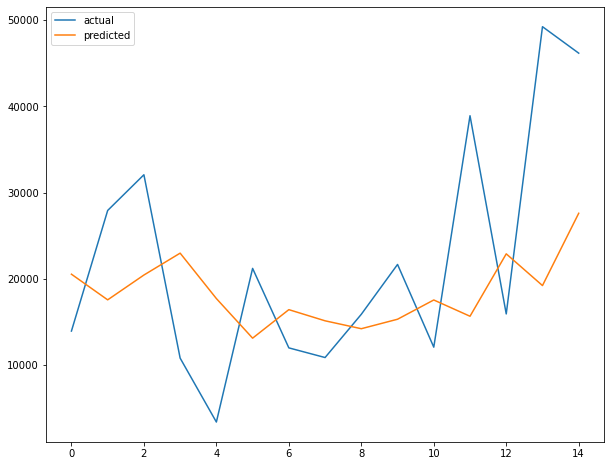

In [45]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)

In [176]:
mse_f=mean_squared_error(df_res.actual,df_res.predicted)
rmse_f=mean_squared_error(df_res.actual,df_res.predicted,squared=False)
print('MSE:',mse_f)
print('RMSE:',rmse_f)

MSE: 176557073.85628274
RMSE: 13287.478084884382


In [47]:
f=pd.DataFrame(forecasted_f[-5:])
f.columns=['sales']
f

,sales
Order Date,
2017-08-31,12091.305543
2017-09-30,38915.067033
2017-10-31,15942.856097
2017-11-30,49236.544560
2017-12-31,46167.484571


In [48]:
arf=pd.DataFrame(ar1.forecast(5))
arf.columns=['sales']
forecast=pd.concat([f,arf],axis=0)

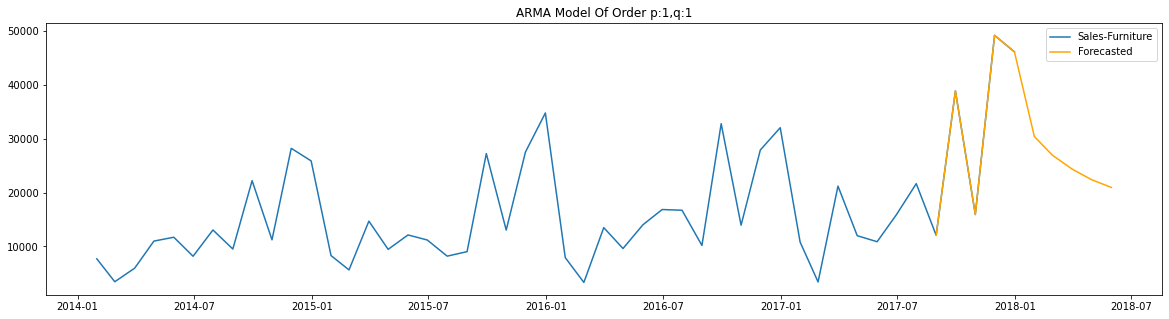

In [51]:
plt.figure(figsize=(20,5))
plt.plot(forecasted_f,label='Sales-Furniture');
plt.plot(forecast['sales'],label='Forecasted',color='orange');
plt.title('ARMA Model Of Order p:1,q:1');
plt.legend()

### Interpretation:

sales of furniture for the next 5 months are almost following the same pattern of previous sales

first increased and then decreased

finally in downward trend

### Office supplies

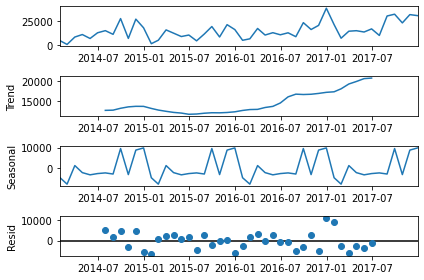

In [52]:
decomposition_o=seasonal_decompose(m_o,period=12)
decomposition_o.plot();

All three are present can go with sarima model

In [53]:
stationarycheck(m_o)

'p_value=0.32948727549472817.Data is not stationary'

In [54]:
diff=m_o-m_o.shift()

In [55]:
diff.dropna(inplace=True)

In [56]:
stationarycheck(diff)

'p_value=0.00042872624590978807.Data is stationary'

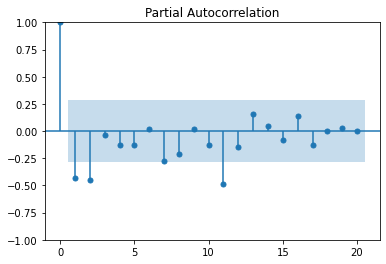

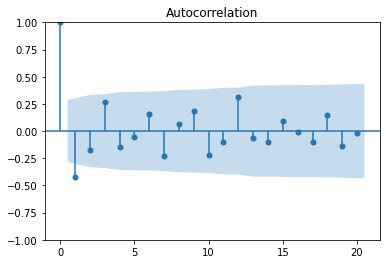

In [61]:
plot_pacf(diff,lags=20);
plot_acf(diff,lags=20);

p=3,q=1

In [65]:
m=[1,2,3]
for i in m:
    arima=ARIMA(m_o,order=(i,1,1)).fit()
    print(i,arima.aic)
    

1 983.2136811668734
2 983.5684043858795
3 984.4831384941845


p=1,q=1

In [67]:
p=1;q=1;d=1
for i in range(1,4):
    for j in range(1,4):
        ms1=sm.tsa.statespace.SARIMAX(m_o,order=(p,d,q),seasonal_order=(i,1,j,12)).fit()
        print(ms1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -354.847
Date:                            Tue, 31 Jan 2023   AIC                            719.695
Time:                                    15:07:42   BIC                            727.471
Sample:                                01-31-2014   HQIC                           722.379
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2665      0.298      0.894      0.371      -0.318       0.851
ma.L1         -0.8765      0.183   

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                   Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -354.864
Date:                                 Tue, 31 Jan 2023   AIC                            721.728
Time:                                         15:07:42   BIC                            731.060
Sample:                                     01-31-2014   HQIC                           724.949
                                          - 12-31-2017                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2647      0.303      0.875      0.382      -0.328       0

                                         SARIMAX Results                                          
Dep. Variable:                                      Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -357.075
Date:                                    Tue, 31 Jan 2023   AIC                            730.150
Time:                                            15:07:44   BIC                            742.593
Sample:                                        01-31-2014   HQIC                           734.446
                                             - 12-31-2017                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2289      0.639      0.358      0

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -355.771
Date:                            Tue, 31 Jan 2023   AIC                            725.542
Time:                                    15:07:45   BIC                            736.430
Sample:                                01-31-2014   HQIC                           729.301
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5116      0.289      1.771      0.077      -0.055       1.078
ma.L1         -0.9932      0.223   

In [68]:
split

33

In [69]:
train1=m_o.iloc[:split]
test1=m_o.iloc[split:]

In [71]:
sarima=sm.tsa.statespace.SARIMAX(m_o,order=(1,1,1),seasonal_order=(1,1,1,12)).fit()
print(sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -354.847
Date:                            Tue, 31 Jan 2023   AIC                            719.695
Time:                                    15:09:49   BIC                            727.471
Sample:                                01-31-2014   HQIC                           722.379
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2665      0.298      0.894      0.371      -0.318       0.851
ma.L1         -0.8765      0.183   

In [74]:
pvalue = sm.stats.acorr_ljungbox(sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

[0.45309637]
Fail-to-Reject H0. Good model


In [72]:
prediction=sarima.predict(len(train),len(train+test)-1)
print(prediction)

Order Date
2016-10-31    11137.121864
2016-11-30    25840.726910
2016-12-31    17149.265019
2017-01-31    17251.134227
2017-02-28    16790.146030
2017-03-31    20462.208035
2017-04-30    16310.890904
2017-05-31    15773.282036
2017-06-30    16524.353634
2017-07-31    15982.144234
2017-08-31    14444.907094
2017-09-30    32116.942447
2017-10-31    19530.844632
2017-11-30    30193.215725
2017-12-31    31890.146090
Freq: M, Name: predicted_mean, dtype: float64


In [79]:
ac=[];pr=[]
test_s=test1.squeeze()
for i in range(len(prediction)):
    ac.append(test_s[i])
    pr.append(prediction[i])
    
pred=pd.DataFrame({'actual':ac,'predicted':pr})
pred['err']=pred.actual-pred.predicted
print(pred)

       actual     predicted           err
0   16281.794  11137.121864   5144.672136
1   20487.278  25840.726910  -5353.448910
2   37997.566  17149.265019  20848.300981
3   21274.289  17251.134227   4023.154773
4    7407.772  16790.146030  -9382.374030
5   14550.286  20462.208035  -5911.922035
6   15072.191  16310.890904  -1238.699904
7   13736.964  15773.282036  -2036.318036
8   16912.039  16524.353634    387.685366
9   10241.468  15982.144234  -5740.676234
10  30059.852  14444.907094  15614.944906
11  31895.843  32116.942447   -221.099447
12  23037.192  19530.844632   3506.347368
13  31472.337  30193.215725   1279.121275
14  30436.942  31890.146090  -1453.204090


In [177]:
mse_o=mean_squared_error(pred.actual,pred.predicted)
rmse_o=mean_squared_error(pred.actual,pred.predicted,squared=False)
print('MSE:',mse_o)
print('RMSE:',rmse_o)

MSE: 61843247.073515676
RMSE: 7864.047753766229


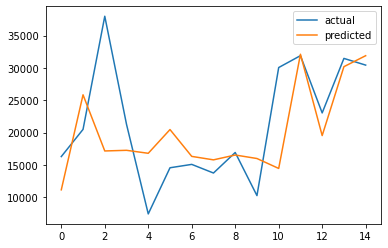

In [81]:
pred.actual.plot(legend=True);
pred.predicted.plot(legend=True);

In [82]:
o=pd.DataFrame(m_o[-5:])
o

,Sales
Order Date,
2017-08-31,30059.852
2017-09-30,31895.843
2017-10-31,23037.192
2017-11-30,31472.337
2017-12-31,30436.942


In [86]:
o_o=pd.DataFrame(sarima.predict(len(test+train),len(train+test)+11))
o_o.columns=['Sales']

In [88]:
os=pd.concat([o,o_o],axis=0)

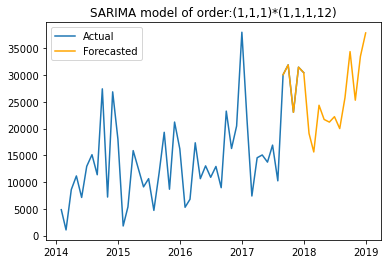

In [89]:
plt.plot(m_o,label='Actual')
plt.plot(os['Sales'],color='orange',label='Forecasted')
plt.title('SARIMA model of order:(1,1,1)*(1,1,1,12)')
plt.legend()

### Interpretation:

the forecasted sales following the same pattern

every year from oct to dec the sales increases

### Technology Sales

In [92]:
stationarycheck(m_t)

'p_value=1.8615967302063814e-06.Data is stationary'

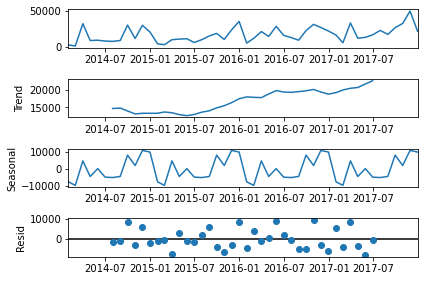

In [93]:
decomposition_t=seasonal_decompose(m_t,period=12)
decomposition_t.plot();

all trend,seasonality and residuals are present

In [145]:
model_t=ExponentialSmoothing(m_t,trend='mul',seasonal='mul',seasonal_periods=12).fit(smoothing_level=0.35,smoothing_trend=0.25,smoothing_seasonal=0.15)

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [146]:
forecasted_t=model_t.fittedvalues

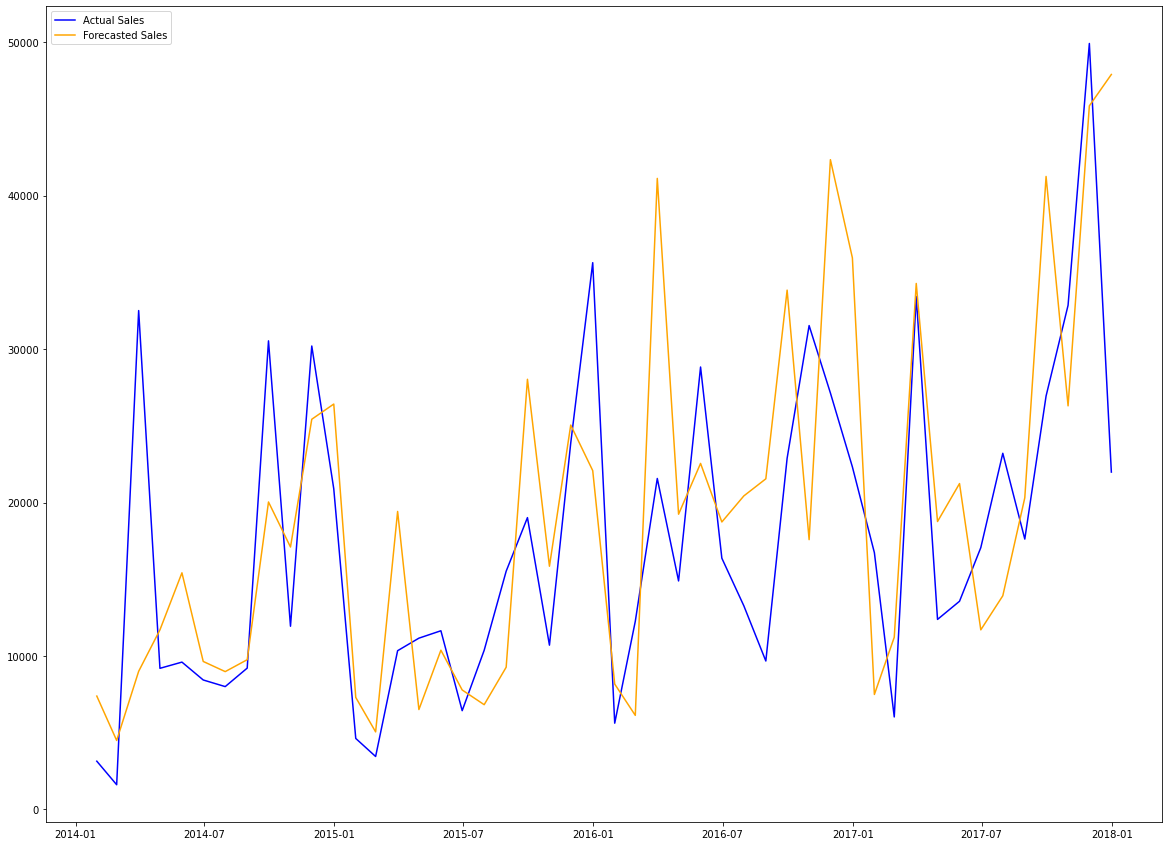

In [147]:
plt.figure(figsize=(20,15))
plt.plot(m_t,color='blue',label='Actual Sales')
plt.plot(forecasted_t,color='orange',label='Forecasted Sales')
plt.legend()

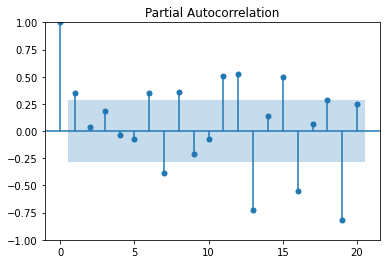

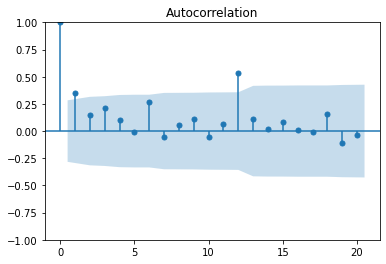

In [148]:
plot_pacf(forecasted_t,lags=20);
plot_acf(forecasted_t,lags=20);

p=10,q=2

In [149]:
w=[1,2,3,4,5,6,7,8,9,10]
for i in w:
    mo=ARIMA(forecasted_t,order=(i,0,0)).fit()
    print(i,mo.aic)

1 1033.2247430169318
2 1034.8353946519708
3 1034.83021903158
4 1036.798998792703
5 1038.5781805077888
6 1034.5010997351405
7 1028.379339288869
8 1024.3341663087776
9 1023.2333202745905
10 1025.3568601222184


In [150]:
e=[1,2]
for i in e:
    ma=ARIMA(forecasted_t,order=(0,0,i)).fit()
    print(i,ma.aic)

1 1034.43515618513
2 1036.266098318535


p=9,q=1

In [152]:
r=[1,2,3,4,5,6,7,8,9]
for i in r:
    arma=ARIMA(forecasted_t,order=(i,0,1)).fit()
    print(arma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -512.856
Date:                Tue, 31 Jan 2023   AIC                           1033.713
Time:                        16:12:08   BIC                           1041.197
Sample:                    01-31-2014   HQIC                          1036.541
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.91e+04   5205.495      3.669      0.000    8897.057    2.93e+04
ar.L1          0.8837      0.215      4.111      0.000       0.462       1.305
ma.L1         -0.5957      0.297     -2.006      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(6, 0, 1)   Log Likelihood                -504.717
Date:                Tue, 31 Jan 2023   AIC                           1027.433
Time:                        16:12:09   BIC                           1044.274
Sample:                    01-31-2014   HQIC                          1033.797
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.91e+04    1.1e+04      1.731      0.083   -2524.839    4.07e+04
ar.L1         -0.1268      0.445     -0.285      0.776      -0.999       0.745
ar.L2          0.2066      0.162      1.280      0.2

In [156]:
arma1=ARIMA(forecasted_t,order=(8,0,1))
ar2=arma1.fit()
print(ar2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(8, 0, 1)   Log Likelihood                -501.393
Date:                Tue, 31 Jan 2023   AIC                           1024.786
Time:                        16:17:09   BIC                           1045.369
Sample:                    01-31-2014   HQIC                          1032.564
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.91e+04   8951.483      2.134      0.033    1555.057    3.66e+04
ar.L1          0.3890      0.565      0.689      0.491      -0.718       1.496
ar.L2         -0.0782      0.429     -0.182      0.8

In [157]:
pvalue = sm.stats.acorr_ljungbox(ar2.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

[0.8066265]
Fail-to-Reject H0. Good model


In [158]:
train3=forecasted_t.iloc[:split]
test3=forecasted_t.iloc[split:]

In [159]:
predictions1=ar2.predict(len(train3),len(train3+test3)-1)
print(predictions1)

Order Date
2016-10-31    10510.570623
2016-11-30    28168.180849
2016-12-31    35331.549200
2017-01-31    26787.329005
2017-02-28     7744.255312
2017-03-31    31488.371637
2017-04-30    14578.851771
2017-05-31    27776.371912
2017-06-30    19620.426011
2017-07-31     9872.342546
2017-08-31    21999.048389
2017-09-30    25621.917266
2017-10-31    22269.203557
2017-11-30    28092.013573
2017-12-31    37479.354703
Freq: M, Name: predicted_mean, dtype: float64


In [162]:
act=[];pre=[]
for i in range(len(predictions1)):
    act.append(test3[i])
    pre.append(predictions1[i])
    
pr=pd.DataFrame({'actual':act,'predicted':pre})
pr['err']=pr.actual-pr.predicted
print(pr)

          actual     predicted           err
0   17581.547435  10510.570623   7070.976812
1   42345.891038  28168.180849  14177.710189
2   35946.622732  35331.549200    615.073532
3    7491.448943  26787.329005 -19295.880061
4   11220.644883   7744.255312   3476.389571
5   34277.967606  31488.371637   2789.595970
6   18762.521643  14578.851771   4183.669872
7   21237.175821  27776.371912  -6539.196092
8   11703.025059  19620.426011  -7917.400953
9   13923.528597   9872.342546   4051.186051
10  20309.422575  21999.048389  -1689.625814
11  41251.800131  25621.917266  15629.882865
12  26301.168478  22269.203557   4031.964921
13  45853.731272  28092.013573  17761.717700
14  47898.186305  37479.354703  10418.831602


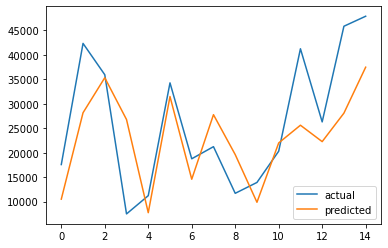

In [163]:
pr.actual.plot(legend=True);
pr.predicted.plot(legend=True);

In [178]:
mse_t=mean_squared_error(pr.actual,pr.predicted)
rmse_t=mean_squared_error(pr.actual,pr.predicted,squared=False)
print('MSE:',mse_t)
print('RMSE:',rmse_t)

MSE: 98025308.00358967
RMSE: 9900.773101308285


In [169]:
t=pd.DataFrame(forecasted_t[-5:])
t.columns=['sales']

In [170]:
t_p=pd.DataFrame(ar2.forecast(12))
t_p.columns=['sales']

In [171]:
ts=pd.concat([t,t_p],axis=0)

Text(0.5, 1.0, 'ARMA model of order:(8,0,1)')

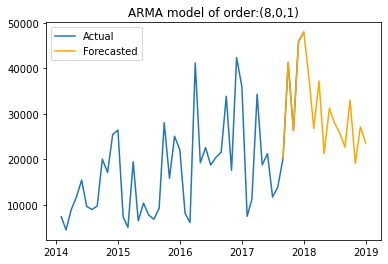

In [172]:
plt.plot(forecasted_t,label='Actual')
plt.plot(ts['sales'],label='Forecasted',color='orange')
plt.legend()
plt.title('ARMA model of order:(8,0,1)')

### Interpretation:

Technology sales is in downward trend

forecasting is done for next one year 

In [179]:
dict={'Category':['Furniture(ARMA)','Office Supplies(SARIMA)','Technology(ARMA)'],'MSE':[mse_f,mse_o,mse_t],'RMSE':[rmse_f,rmse_o,rmse_t]}
compare=pd.DataFrame(dict)
compare

,Category,MSE,RMSE
0,Furniture(ARMA),1.765571e+08,13287.478085
1,Office Supplies(SARIMA),6.184325e+07,7864.047754
2,Technology(ARMA),9.802531e+07,9900.773101
